<a href="https://colab.research.google.com/github/ChristopherLiew/Building-A-Generalisable-Red-Wine-Quality-Classifier/blob/master/Gaussian_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> The Gaussian Naive Bayes Classifier </h1>




In [0]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use('ggplot') # optional: for ggplot-like style
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

In [8]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
wine_df = pd.read_csv("/content/gdrive/My Drive/Business Analytics Stuff/BT2101 Group Project/winequality-red.csv")

<h2>Wrangled & Processed Red Wine Quality Dataset</h2>
<p> Tree-based methods are invariant to monotonic transformations, in this case feature scaling, thus we do not need to feature scale. </p>
<p></p>
<p>Additionally, since Tree-based methods utilise entropy and information gain to essentially engage in 'automatic' feature selection, feature selection will not be used. Instead, we will compute the feature importance and iteratively remove any features which have an insignificant amount of feature importance.</p>

In [10]:
# Creating the Binary Target Variable
wine_df["good_quality"] = wine_df["quality"] >= 7

# Target Variable
target = wine_df.loc[:, 'good_quality']
target = target.astype(int)  # 1 = good quality & 0 = other quality
target

# Interaction Terms
final_df = wine_df.drop(columns=['quality', 'good_quality']).copy()
final_df['total acidity'] = final_df['fixed acidity'] + final_df['volatile acidity']
final_df['pH_sulphate'] = final_df['pH'] * final_df['sulphates']

final_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,total acidity,pH_sulphate
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,8.10,1.9656
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,8.68,2.1760
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,8.56,2.1190
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,11.48,1.8328
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,8.10,1.9656
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,8.06,1.9656
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,8.50,1.5180
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7.95,1.5933
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,8.38,1.9152
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,8.00,2.6800


<h2>Train-Test Data</h2>
<p> Train: 75% & Test: 25%</p>

In [0]:
X_train, X_test, y_train, y_test = train_test_split(final_df, target, test_size=0.25,random_state=0)

<h2>Training the GaussianNB Classifier</h2>

In [0]:
GNB_classifier = GaussianNB()
GNB_classifier.fit(X_train, y_train)

#Predictions
y_pred = GNB_classifier.predict(X_test)

<h2>Evaluating the Naive Bayes Classifier</h2>

<h3>Classification Report</h3>

In [13]:
report = classification_report(y_test, y_pred, output_dict = True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.961290,0.839437,0.896241,355.0000
1,0.366667,0.733333,0.488889,45.0000
accuracy,0.827500,0.827500,0.827500,0.8275
macro avg,0.663978,0.786385,0.692565,400.0000
weighted avg,0.894395,0.827500,0.850414,400.0000


<h3>ROC & AUC</h3>

Decision Trees: ROC AUC=0.854


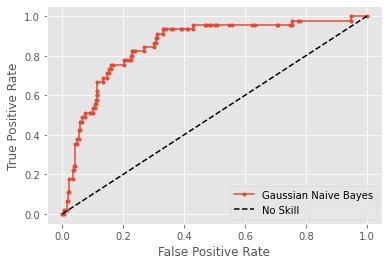

In [15]:
# prediction probabilities
gnb_probs = GNB_classifier.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only
gnb_probs = gnb_probs[:, 1]
# calculate scores
gnb_auc = roc_auc_score(y_test, gnb_probs)
ns_auc = roc_auc_score(y_test, ns_probs) # 0.5
# summarize scores
print('Decision Trees: ROC AUC=%.3f' % (gnb_auc))
# calculate ROC curves
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
# plot the ROC curve for the Decision Tree Classifier
plt.plot(gnb_fpr, gnb_tpr, marker='.', label='Gaussian Naive Bayes')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color = "black")
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

<h3>Precision Recall Curve</h3>

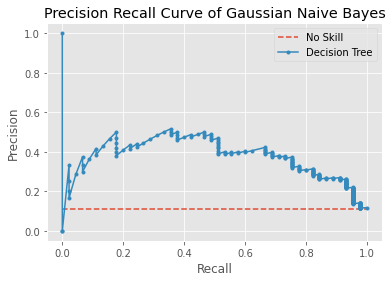

In [16]:
gnb_probs = GNB_classifier.predict_proba(X_test)
gnb_probs = gnb_probs[:, 1] # Keep probability predictions for good quality (=1) class only
precisions, recalls, _ = precision_recall_curve(y_test, gnb_probs)

# Plot PR-Curve
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recalls, precisions, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# annotate optimised model's recall and precision
# Title
plt.title("Precision Recall Curve of Gaussian Naive Bayes")
# show the plot
plt.show()

<h1> Permutation Importance </h1>

In [17]:
# Permutation Importance (eli5)
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance
GNB_classifier = GaussianNB()
GNB_classifier.fit(X_train, y_train)
perm = PermutationImportance(GNB_classifier, random_state=1, scoring="f1_macro", n_iter=10).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist()) # See on Jupyter Notebook

     |████████████████████████████████| 112kB 36.0MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


Weight,Feature
0.0651 ± 0.0434,alcohol
0.0248 ± 0.0161,chlorides
0.0131 ± 0.0173,fixed acidity
0.0095 ± 0.0198,total sulfur dioxide
0.0089 ± 0.0120,total acidity
0.0085 ± 0.0242,sulphates
0.0046 ± 0.0360,pH_sulphate
0.0044 ± 0.0163,free sulfur dioxide
0.0037 ± 0.0103,pH
0.0006 ± 0.0201,volatile acidity


In [18]:
# Results from Perm Importance ELI5 Feature Selection
X_train_eli5 = X_train.copy()
X_train_eli5 = X_train_eli5.drop(columns = ['density', 'residual sugar', 'citric acid'])
GNB_classifier_eli5 = GaussianNB()
GNB_classifier_eli5.fit(X_train_eli5, y_train)
y_pred = GNB_classifier_eli5.predict(X_test.drop(columns =  ['density', 'residual sugar', 'citric acid']))
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.953271,0.861972,0.905325,355.00
1,0.379747,0.666667,0.483871,45.00
accuracy,0.840000,0.840000,0.840000,0.84
macro avg,0.666509,0.764319,0.694598,400.00
weighted avg,0.888750,0.840000,0.857912,400.00


<p>Slight improvement in macro averaged f1, but still a poorer performance vis a vis less 'naive' methods such as SVM or Random Forest</p>